In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eurbpdb/homo_sapiens.txt
/kaggle/input/eurbpdb/homo_sapiens.RBP.fa


In [2]:
!pip install transformers torch tqdm
!pip install transformers tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
print(classifier("Kaggle notebooks are awesome!"))


2025-07-28 03:44:47.610860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753674287.802234      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753674287.862118      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998492002487183}]


If using ProtBERT, we would set model_name = "Rostlab/prot_bert_bfd" and also specify do_lower_case=False when loading its tokenizer (because amino acids are uppercase).

In [3]:
import re
import torch
from transformers import AutoTokenizer, AutoModel

# Choose model (ESM-2 in this example; for ProtBERT, use "Rostlab/prot_bert_bfd")
model_name = "facebook/esm2_t33_650M_UR50D"  
tokenizer = AutoTokenizer.from_pretrained(model_name) 
model = AutoModel.from_pretrained(model_name) 
model.to("cuda")  # move to GPU for faster inference
model.eval()      # set to evaluation mode (no dropout)


tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

2025-10-06 03:19:09.447147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759720749.809597      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759720749.911600      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/2.61G [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


EsmModel(
  (embeddings): EsmEmbeddings(
    (word_embeddings): Embedding(33, 1280, padding_idx=1)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): EsmEncoder(
    (layer): ModuleList(
      (0-32): 33 x EsmLayer(
        (attention): EsmAttention(
          (self): EsmSelfAttention(
            (query): Linear(in_features=1280, out_features=1280, bias=True)
            (key): Linear(in_features=1280, out_features=1280, bias=True)
            (value): Linear(in_features=1280, out_features=1280, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (rotary_embeddings): RotaryEmbedding()
          )
          (output): EsmSelfOutput(
            (dense): Linear(in_features=1280, out_features=1280, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (LayerNorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        )
        (intermediate): EsmIntermediate(
          (dense): Linear(in_features=1280, out_feature

In [6]:
import requests
import shutil

# UniProt stream endpoint
url = "https://rest.uniprot.org/uniprotkb/stream"

# Query: Reviewed human proteins (Swiss-Prot) that are not RNA-binding and ≥50 AA
query = (
    "reviewed:true AND organism_id:9606 "
    "AND NOT keyword:KW-0694 "
    "AND NOT go:0003723 "
    "AND length:[50 TO *]"
)

params = {
    "query": query,
    "format": "fasta",
    "includeIsoform": "false"
}

# Download and save the FASTA
try:
    with requests.get(url, params=params, stream=True, timeout=120) as r:
        r.raise_for_status()
        with open("human_non_RBP_raw.fasta", "wb") as f:
            shutil.copyfileobj(r.raw, f)
        print("✅ FASTA downloaded successfully –", r.headers.get("x-total-results", "?"), "sequences.")
except requests.exceptions.RequestException as e:
    print("❌ Download failed:", e)

✅ FASTA downloaded successfully – ? sequences.


In [7]:
import gzip

def count_fasta_sequences(filepath):
    with gzip.open(filepath, mode="rt", encoding="utf-8") as f:
        return sum(1 for line in f if line.startswith(">"))

print("🔍 Sequences in file:", count_fasta_sequences("/kaggle/working/human_non_RBP_raw.fasta"))


🔍 Sequences in file: 18643


In [4]:
!conda install -c bioconda cd-hit -y
!cd-hit -h  # sanity-check


/bin/bash: line 1: conda: command not found
/bin/bash: line 1: cd-hit: command not found


In [5]:
pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests, shutil, subprocess, pathlib

# Clean, valid UniProt query
query = (
    "reviewed:true AND organism_id:9606 AND length:[50 TO *] "
    "AND NOT keyword:KW-0694 "
    "AND NOT keyword:KW-0820 "
    "AND NOT keyword:KW-0699 "
    "AND NOT go:0003723 "
    "AND NOT xref:pfam-PF00076 "
    "AND NOT xref:pfam-PF00013 "
    "AND NOT xref:pfam-PF00035 "
    "AND NOT xref:pfam-PF00806 "
    "AND NOT xref:interpro-IPR000504 "
    "AND NOT xref:interpro-IPR004088 "
    "AND NOT xref:interpro-IPR014721 "
    "AND NOT xref:interpro-IPR000313"
)

url = "https://rest.uniprot.org/uniprotkb/stream"
params = {"query": query, "format": "fasta", "compressed": "false"}
out = pathlib.Path("uniprot_human_nonRBP_raw.fasta")

# Download stream
with requests.get(url, params=params, stream=True, timeout=180) as r:
    r.raise_for_status()
    with out.open("wb") as fh:
        shutil.copyfileobj(r.raw, fh)
    print(" ", r.headers.get("x-total-results", "???"), "sequences downloaded")




  ??? sequences downloaded


In [7]:
import gzip

def count_fasta_sequences(filepath):
    with gzip.open(filepath, mode="rt", encoding="utf-8") as f:
        return sum(1 for line in f if line.startswith(">"))

print("Sequences in file:", count_fasta_sequences("/kaggle/working/uniprot_human_nonRBP_raw.fasta"))


Sequences in file: 18612


In [8]:
from Bio import SeqIO
import pathlib

in_file = pathlib.Path("/kaggle/input/eurbpdb/homo_sapiens.RBP.fa")

total = sum(1 for _ in SeqIO.parse(in_file.open(), "fasta"))
print("Total sequences before cleaning:", total)


Total sequences before cleaning: 109095


In [9]:
from Bio import SeqIO
from Bio.Seq import Seq

import re, pathlib

in_file  = pathlib.Path("/kaggle/input/eurbpdb/homo_sapiens.RBP.fa")
out_file = pathlib.Path("/kaggle/working/rbp_clean.fa")

allowed = set("ACDEFGHIKLMNPQRSTVWYBZXUO")   # legal AA codes

kept = 0
with in_file.open() as inp, out_file.open("w") as out:
    for rec in SeqIO.parse(inp, "fasta"):
        seq = str(rec.seq).replace(" ", "").replace("\t", "").upper()
        if len(seq) < 50:                # drop micro-peptides
            continue
        if "*" in seq:                   # drop sequences with stop codons
            continue
        if set(seq) - allowed:           # drop weird letters
            continue
        rec.seq = Seq(seq)
        SeqIO.write(rec, out, "fasta")
        kept += 1
print("kept", kept, "clean RBP sequences")


kept 102621 clean RBP sequences


In [10]:
%%bash
set -euxo pipefail
apt-get update -yqq
apt-get install -yqq mmseqs2 seqkit

# positives (your rbp_clean.fa from the strict script)
mmseqs easy-cluster /kaggle/working/rbp_clean.fa /kaggle/working/rbp40 tmp \
  --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2

Selecting previously unselected package libgzstream0:amd64.
(Reading database ... 128663 files and directories currently installed.)
Preparing to unpack .../libgzstream0_1.5+git20171107.9a20658-1_amd64.deb ...
Unpacking libgzstream0:amd64 (1.5+git20171107.9a20658-1) ...
Selecting previously unselected package mmseqs2.
Preparing to unpack .../mmseqs2_13-45111+ds-2_amd64.deb ...
Unpacking mmseqs2 (13-45111+ds-2) ...
Selecting previously unselected package seqkit.
Preparing to unpack .../seqkit_2.1.0+ds-1ubuntu0.1_amd64.deb ...
Unpacking seqkit (2.1.0+ds-1ubuntu0.1) ...
Setting up seqkit (2.1.0+ds-1ubuntu0.1) ...
Setting up libgzstream0:amd64 (1.5+git20171107.9a20658-1) ...
Setting up mmseqs2 (13-45111+ds-2) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/loca

+ apt-get update -yqq
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
+ apt-get install -yqq mmseqs2 seqkit
+ mmseqs easy-cluster /kaggle/working/rbp_clean.fa /kaggle/working/rbp40 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2


In [11]:
def count_fasta_sequences(filepath):
    with open(filepath, mode="rt", encoding="utf-8") as f:
        return sum(1 for line in f if line.startswith(">"))

print("Sequences in file:", count_fasta_sequences("/kaggle/working/rbp40_rep_seq.fasta"))


Sequences in file: 46770


In [12]:
%%bash
set -euxo pipefail
apt-get update -yqq
apt-get install -yqq mmseqs2 seqkit

# 1) clean positives
seqkit seq -u -g -m 50 /kaggle/input/eurbpdb/homo_sapiens.RBP.fa |
  seqkit grep -v -s -p '*' \
  > /kaggle/working/rbp_clean.fa

# 2) 40% identity clustering with sensible coverage
mmseqs easy-cluster /kaggle/working/rbp_clean.fa /kaggle/working/rbp40 tmp \
  --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2



easy-cluster /kaggle/working/rbp_clean.fa /kaggle/working/rbp40 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2 

MMseqs Version:                     	13-45111+ds-2
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues            	0
Minimum diagona

+ apt-get update -yqq
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
+ apt-get install -yqq mmseqs2 seqkit
+ seqkit seq -u -g -m 50 /kaggle/input/eurbpdb/homo_sapiens.RBP.fa
+ seqkit grep -v -s -p '*'
+ mmseqs easy-cluster /kaggle/working/rbp_clean.fa /kaggle/working/rbp40 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2


In [12]:
%%bash
set -euxo pipefail

# 0) sanity check: is the file there and non-empty?
ls -lh /kaggle/working/uniprot_human_nonRBP_raw.fasta
head -n 2 /kaggle/working/uniprot_human_nonRBP_raw.fasta || true

# 1) clean the UniProt negatives:
#    - strip gaps/whitespace (-g -u), drop <50 aa (-m 50), drop any with '*'
#    - replace rarely unsupported letters U/O/J with X (safe for clustering)
seqkit seq -u -g -m 50 /kaggle/working/uniprot_human_nonRBP_raw.fasta \
 | seqkit grep -v -s -p '*' \
 | sed -E 's/[UOJ]/X/g' \
 > /kaggle/working/nonrbp_clean.fa

# quick stats (optional)
seqkit stats /kaggle/working/nonrbp_clean.fa

# 2) FORCE amino-acid DB and cluster (equivalent to easy-cluster)
mmseqs createdb --dbtype 1 \
  /kaggle/working/nonrbp_clean.fa /kaggle/working/nonrbpDB

mmseqs cluster /kaggle/working/nonrbpDB /kaggle/working/nonrbpClu tmp \
  --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2

# 3) export representatives to FASTA
mmseqs result2repseq /kaggle/working/nonrbpDB /kaggle/working/nonrbpClu \
  /kaggle/working/nonrbp_rep

mmseqs result2flat  /kaggle/working/nonrbpDB /kaggle/working/nonrbpDB \
  /kaggle/working/nonrbp_rep /kaggle/working/nonrbp40_rep_seq.fasta

echo "non-RBP reps: /kaggle/working/nonrbp40_rep_seq.fasta"


-rw-r--r-- 1 root root 6.5M Oct  6 03:20 /kaggle/working/uniprot_human_nonRBP_raw.fasta
3.{oW(�l�r�>��[�9MJ}w���9c�}5�hŷ��w�3{���}��o������xs7Յ=9�/8.��2���bv��}M������p[;�i���4˿yϤ�I�׻����9Òw����cp�\�~�}����k������6�2۬�Ekgu.�wnf;�:��qs�n�ad;�ϲ�#N������ֶ�Nc�UJ(;��=�}ߦ�5�r���eo��`��{��9ʜs�a7f6g�9Zpv�J1%^u����z
%,������m��n�a����p�aL��k�4�h��n�ʈ�{�=����f^���_�|����o_|�����κ������Ͻ�	��ެ5�=�F�^���[� �&��R���׾^{�[�6����}6��0�X����䘲t�}Vם�>^Nzֿ�߼[�W��_.�׾�r������'3j3��c/�0w�:��}�Jf��>��..�J��t�k�eY���Ӎ�s�n�qحLǏ9vl�����VnvĽ:��]Yl�N|a�nz.��F1�f��5t.��U�X�=a;��`�~����F9���!�������o��a����߾�O�<�����o_�y��O���oO������^���W�;�wPakYM
file                             format  type     num_seqs     sum_len  min_len  avg_len  max_len
/kaggle/working/nonrbp_clean.fa  FASTA   Protein    18,612  10,319,142       50    554.4   34,350
createdb --dbtype 1 /kaggle/working/nonrbp_clean.fa /kaggle/working/nonrbpDB 

MMseqs Version:       	13-45111+ds-2
Databas

+ ls -lh /kaggle/working/uniprot_human_nonRBP_raw.fasta
+ head -n 2 /kaggle/working/uniprot_human_nonRBP_raw.fasta
+ seqkit seq -u -g -m 50 /kaggle/working/uniprot_human_nonRBP_raw.fasta
+ seqkit grep -v -s -p '*'
+ sed -E 's/[UOJ]/X/g'
+ seqkit stats /kaggle/working/nonrbp_clean.fa
+ mmseqs createdb --dbtype 1 /kaggle/working/nonrbp_clean.fa /kaggle/working/nonrbpDB
+ mmseqs cluster /kaggle/working/nonrbpDB /kaggle/working/nonrbpClu tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2
+ mmseqs result2repseq /kaggle/working/nonrbpDB /kaggle/working/nonrbpClu /kaggle/working/nonrbp_rep
+ mmseqs result2flat /kaggle/working/nonrbpDB /kaggle/working/nonrbpDB /kaggle/working/nonrbp_rep /kaggle/working/nonrbp40_rep_seq.fasta
+ echo 'non-RBP reps: /kaggle/working/nonrbp40_rep_seq.fasta'


In [13]:
def count_fasta_sequences(filepath):
    with open(filepath, mode="rt", encoding="utf-8") as f:
        return sum(1 for line in f if line.startswith(">"))

print("Sequences in file:", count_fasta_sequences("/kaggle/working/nonrbp40_rep_seq.fasta"))


Sequences in file: 12994


In [14]:
%%bash
set -euxo pipefail

# search negatives vs positives at the same 40% id / 80% cov
mmseqs easy-search /kaggle/working/nonrbp40_rep_seq.fasta \
                   /kaggle/working/rbp40_rep_seq.fasta \
                   /kaggle/working/neg_vs_pos_40.m8 tmp \
                   --min-seq-id 0.4 -c 0.8 --cov-mode 0 --threads 2


easy-search /kaggle/working/nonrbp40_rep_seq.fasta /kaggle/working/rbp40_rep_seq.fasta /kaggle/working/neg_vs_pos_40.m8 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --threads 2 

MMseqs Version:                        	13-45111+ds-2
Substitution matrix                    	nucl:nucleotide.out,aa:blosum62.out
Add backtrace                          	false
Alignment mode                         	3
Alignment mode                         	0
Allow wrapped scoring                  	false
E-value threshold                      	0.001
Seq. id. threshold                     	0.4
Min alignment length                   	0
Seq. id. mode                          	0
Alternative alignments                 	0
Coverage threshold                     	0.8
Coverage mode                          	0
Max sequence length                    	65535
Compositional bias                     	1
Max reject                             	2147483647
Max accept                             	2147483647
Include identical seq. id. 

+ mmseqs easy-search /kaggle/working/nonrbp40_rep_seq.fasta /kaggle/working/rbp40_rep_seq.fasta /kaggle/working/neg_vs_pos_40.m8 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --threads 2


In [21]:
%%bash
set -euxo pipefail

mmseqs easy-search /kaggle/working/nonrbp40_rep_seq.fasta \
                   /kaggle/working/rbp40_rep_seq.fasta \
                   /kaggle/working/neg_vs_pos_strict.m8 tmp \
                   --min-seq-id 0.6 -c 0.6 --cov-mode 0 --threads 2
# Then drop only those matches; you should still keep several thousand negatives.


easy-search /kaggle/working/nonrbp40_rep_seq.fasta /kaggle/working/rbp40_rep_seq.fasta /kaggle/working/neg_vs_pos_strict.m8 tmp --min-seq-id 0.6 -c 0.6 --cov-mode 0 --threads 2 

MMseqs Version:                        	13-45111+ds-2
Substitution matrix                    	nucl:nucleotide.out,aa:blosum62.out
Add backtrace                          	false
Alignment mode                         	3
Alignment mode                         	0
Allow wrapped scoring                  	false
E-value threshold                      	0.001
Seq. id. threshold                     	0.6
Min alignment length                   	0
Seq. id. mode                          	0
Alternative alignments                 	0
Coverage threshold                     	0.6
Coverage mode                          	0
Max sequence length                    	65535
Compositional bias                     	1
Max reject                             	2147483647
Max accept                             	2147483647
Include identical seq. 

+ mmseqs easy-search /kaggle/working/nonrbp40_rep_seq.fasta /kaggle/working/rbp40_rep_seq.fasta /kaggle/working/neg_vs_pos_strict.m8 tmp --min-seq-id 0.6 -c 0.6 --cov-mode 0 --threads 2


In [15]:
from Bio import SeqIO
import pandas as pd, pathlib

hits = pd.read_csv("/kaggle/working/neg_vs_pos_40.m8", sep="\t", header=None, usecols=[0])
bad = set(hits[0].astype(str))  # negative IDs to remove

neg_in  = "/kaggle/working/nonrbp40_rep_seq.fasta"
neg_out = "/kaggle/working/nonrbp_final.fasta"

kept = 0
with open(neg_out, "w") as out:
    for rec in SeqIO.parse(neg_in, "fasta"):
        if rec.id.split()[0] not in bad:    # mmseqs uses ID up to first space
            SeqIO.write(rec, out, "fasta")
            kept += 1
print("kept", kept, "clean negatives ->", neg_out)


✅ kept 757 clean negatives -> /kaggle/working/nonrbp_final.fasta


In [16]:
from Bio import SeqIO, Seq
pos = sum(1 for _ in SeqIO.parse("/kaggle/working/rbp40_rep_seq.fasta", "fasta"))
neg = sum(1 for _ in SeqIO.parse("/kaggle/working/nonrbp_final.fasta", "fasta"))
print(f"Pos reps: {pos} | Neg reps (clean): {neg}")


Pos reps: 46770 | Neg reps (clean): 757


In [24]:
from Bio import SeqIO
import pandas as pd, pathlib

hits = pd.read_csv("/kaggle/working/neg_vs_pos_strict.m8", sep="\t", header=None, usecols=[0])
bad = set(hits[0].astype(str))  # negative IDs to remove

neg_in  = "/kaggle/working/nonrbp40_rep_seq.fasta"
neg_out = "/kaggle/working/nonrbp_final_strict.fasta"

kept = 0
with open(neg_out, "w") as out:
    for rec in SeqIO.parse(neg_in, "fasta"):
        if rec.id.split()[0] not in bad:    # mmseqs uses ID up to first space
            SeqIO.write(rec, out, "fasta")
            kept += 1
print("✅ kept", kept, "clean negatives ->", neg_out)


✅ kept 725 clean negatives -> /kaggle/working/nonrbp_final_strict.fasta


In [25]:
from Bio import SeqIO, Seq
pos = sum(1 for _ in SeqIO.parse("/kaggle/working/rbp40_rep_seq.fasta", "fasta"))
neg = sum(1 for _ in SeqIO.parse("/kaggle/working/nonrbp_final_strict.fasta", "fasta"))
print(f"Pos reps: {pos} | Neg reps (clean): {neg}")


Pos reps: 46770 | Neg reps (clean): 725


In [14]:
from Bio import SeqIO, Seq
pos = sum(1 for _ in SeqIO.parse("/kaggle/working/rbp40_rep_seq.fasta", "fasta"))
neg = sum(1 for _ in SeqIO.parse("/kaggle/working/nonrbp40_rep_seq.fasta", "fasta"))
print(f"Pos reps: {pos} | Neg reps (clean): {neg}")


Pos reps: 46770 | Neg reps (clean): 12994


In [16]:
from Bio import SeqIO
from pathlib import Path

pos_fa = Path("/kaggle/working/rbp40_rep_seq.fasta")
neg_fa = Path("/kaggle/working/nonrbp40_rep_seq.fasta")
pos_out = Path("/kaggle/working/rbp40_rep_seq.nodup.fasta")
neg_out = Path("/kaggle/working/nonrbp40_rep_seq.nodup.fasta")

# build sequence->list(ids) maps
def load_map(fa):
    m = {}
    for rec in SeqIO.parse(str(fa), "fasta"):
        s = str(rec.seq)
        m.setdefault(s, []).append(rec.id.split()[0])
    return m

pos_map = load_map(pos_fa)
neg_map = load_map(neg_fa)

# sequences that appear in both sets (conflicting labels)
conflict_seqs = set(pos_map.keys()) & set(neg_map.keys())
print("conflicting exact sequences across classes:", len(conflict_seqs))

# write out filtered FASTAs (drop conflicting sequences from the NEGATIVE set)
keep_neg = set()
for s, ids in neg_map.items():
    if s not in conflict_seqs:
        keep_neg.update(ids)

with neg_out.open("w") as out:
    for rec in SeqIO.parse(str(neg_fa), "fasta"):
        if rec.id.split()[0] in keep_neg:
            SeqIO.write(rec, out, "fasta")

# positives unchanged (if you want, you can also drop conflicts from pos instead)
pos_out.write_text(pos_fa.read_text())
print("wrote", pos_out, "and", neg_out)


conflicting exact sequences across classes: 9660
wrote /kaggle/working/rbp40_rep_seq.nodup.fasta and /kaggle/working/nonrbp40_rep_seq.nodup.fasta


In [29]:
%%bash
set -euxo pipefail
# (run once for negatives)
mmseqs easy-cluster /kaggle/working/nonrbp40_rep_seq.nodup.fasta /kaggle/working/nonrbp40 tmp \
  --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2
# produces /kaggle/working/nonrbp40_cluster.tsv


easy-cluster /kaggle/working/nonrbp40_rep_seq.nodup.fasta /kaggle/working/nonrbp40 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2 

MMseqs Version:                     	13-45111+ds-2
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues           

+ mmseqs easy-cluster /kaggle/working/nonrbp40_rep_seq.nodup.fasta /kaggle/working/nonrbp40 tmp --min-seq-id 0.4 -c 0.8 --cov-mode 0 --cluster-mode 2 --threads 2


In [30]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

def read_clusters(tsv_path):
    # easy-cluster cluster.tsv has 2 columns: member \t representative
    df = pd.read_csv(tsv_path, sep="\t", header=None, names=["member","rep"])
    # cluster id = rep id
    return df

pos_clu = read_clusters("/kaggle/working/rbp40_cluster.tsv")
neg_clu = read_clusters("/kaggle/working/nonrbp40_cluster.tsv")

def make_group_split(df, test_size=0.2, val_size=0.1, seed=1337):
    reps = df["rep"].unique()
    reps_train, reps_test = train_test_split(reps, test_size=test_size, random_state=seed, shuffle=True)
    reps_train, reps_val  = train_test_split(reps_train, test_size=val_size/(1.0-test_size), random_state=seed)
    split_map = {}
    for k, name in [(reps_train,"train"),(reps_val,"val"),(reps_test,"test")]:
        for r in k: split_map[r] = name
    df = df.copy()
    df["split"] = df["rep"].map(split_map)
    return df

pos_split = make_group_split(pos_clu)
neg_split = make_group_split(neg_clu)

pos_split.to_csv("/kaggle/working/rbp40_split.tsv", sep="\t", index=False)
neg_split.to_csv("/kaggle/working/nonrbp40_split.tsv", sep="\t", index=False)
print("wrote split maps")


✅ wrote split maps


In [18]:
print(f" pos_split shape: {pos_split.shape}")  # (rows, columns)
print(f" neg_split shape: {neg_split.shape}")


NameError: name 'pos_split' is not defined

In [21]:
from Bio import SeqIO
import pandas as pd

pos_fa = "/kaggle/working/rbp40_rep_seq.nodup.fasta"
neg_fa = "/kaggle/working/nonrbp40_rep_seq.nodup.fasta"

def read_ids(fa):
    ids, lens = [], []
    for r in SeqIO.parse(fa, "fasta"):
        # mmseqs keeps the ID up to first space; mirror that
        ids.append(r.id.split()[0])
        lens.append(len(r.seq))
    return pd.DataFrame({"id": ids, "length": lens})

df_pos = read_ids(pos_fa); df_pos["label"] = 1
df_neg = read_ids(neg_fa); df_neg["label"] = 0

meta = pd.concat([df_pos, df_neg], ignore_index=True)
meta.to_csv("/kaggle/working/rbp_meta.csv", index=False)
print(meta.label.value_counts())


label
1    46770
0     3384
Name: count, dtype: int64


In [23]:
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np

# length bins as weak groups (proxy for composition/size)
bins = np.clip((meta["length"] / 200).astype(int), 0, 10)
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

folds = []
for f,(tr,te) in enumerate(skf.split(meta["id"], meta["label"], groups=bins)):
    meta.loc[te, "fold"] = f
meta["fold"] = meta["fold"].astype(int)
meta.to_csv("/kaggle/working/rbp_meta_folds.csv", index=False)
meta["fold"].value_counts()


fold
4    34623
0    12166
2     1537
1      925
3      903
Name: count, dtype: int64

In [24]:
import torch, math
from transformers import AutoTokenizer, AutoModel
from Bio import SeqIO
import numpy as np
from pathlib import Path

device = "cuda"
model_name = "facebook/esm2_t33_650M_UR50D"  # ~650M, hidden ~1280
tok = AutoTokenizer.from_pretrained(model_name)
mdl = AutoModel.from_pretrained(model_name).to(device)
mdl.eval()

MAX_TOK = 1022  # ESM2 context size (including specials)
# leave room for specials; keep chunks <= 1000 AA
CHUNK_AA = 1000

@torch.no_grad()
def embed_seq(seq: str):
    """Return (D,) pooled embedding for one protein."""
    # Chunk long sequences
    chunks = [seq[i:i+CHUNK_AA] for i in range(0, len(seq), CHUNK_AA)]
    vecs = []
    for ch in chunks:
        enc = tok(ch, return_tensors="pt", add_special_tokens=True)
        enc = {k: v.to(device) for k,v in enc.items()}
        with torch.cuda.amp.autocast():
            out = mdl(**enc)
        hs = out.last_hidden_state  # [1, L, D]
        # mask out specials
        ids = enc["input_ids"][0]
        mask = (ids != tok.pad_token_id) \
             & (ids != tok.cls_token_id) \
             & (ids != tok.eos_token_id)
        pooled = (hs[0][mask].mean(0)).float()  # [D]
        vecs.append(pooled)
    return torch.stack(vecs, 0).mean(0).cpu().numpy()

def embed_fasta(fa_path, out_npz):
    ids, arr = [], []
    for rec in SeqIO.parse(fa_path, "fasta"):
        pid = rec.id.split()[0]
        v = embed_seq(str(rec.seq))
        ids.append(pid); arr.append(v)
    arr = np.stack(arr, 0).astype(np.float16)  # save space
    np.savez_compressed(out_npz, ids=np.array(ids), X=arr)

embed_fasta("/kaggle/working/rbp40_rep_seq.fasta",
            "/kaggle/working/X_pos_esm2.npz")
embed_fasta("/kaggle/working/nonrbp40_rep_seq.fasta",
            "/kaggle/working/X_neg_esm2.npz")


Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_36/1611018488.py:26: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


In [25]:
import re, numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler

def canon_id(s: str) -> str:
    s = str(s).strip()
    # take up to first whitespace
    s = s.split()[0]
    # uniProt-like headers: sp|P17097|NAME_HUMAN or tr|Q9...|
    if "|" in s:
        parts = s.split("|")
        # common patterns: sp|ACC|...  tr|ACC|...  UPI|ACC|...
        if len(parts) >= 2 and parts[0] in {"sp", "tr", "UPI"}:
            return parts[1]
    return s  # already an accession like P17097

def load_npz_map(path, label):
    z = np.load(path, allow_pickle=True)
    ids = z["ids"]
    X = z["X"]
    # ensure str dtype
    ids = ids.astype(str)
    m = {}
    for i, pid in enumerate(ids):
        k = canon_id(pid)
        m[k] = (X[i], label)
    return m

meta = pd.read_csv("/kaggle/working/rbp_meta_folds.csv")
# add canonical id column
meta["kid"] = meta["id"].apply(canon_id)

# build embedding map with canonical keys
id2row = {}
id2row.update(load_npz_map("/kaggle/working/X_pos_esm2.npz", 1))
id2row.update(load_npz_map("/kaggle/working/X_neg_esm2.npz", 0))

# sanity: which meta IDs are missing from embeddings?
missing = [k for k in meta["kid"] if k not in id2row]
print(f"Missing in embeddings: {len(missing)}")
if len(missing) > 0:
    print("Examples:", missing[:10])
    # Option A (recommended): drop missing rows for now
    meta = meta[~meta["kid"].isin(missing)].reset_index(drop=True)
    # Option B: embed those missing IDs now (if caused by earlier crash)

# align X, y, fold
X = np.stack([id2row[k][0] for k in meta["kid"]])
y = meta["label"].astype(int).values
fold = meta["fold"].astype(int).values

# scale (ok for linear models / small MLP)
scaler = StandardScaler()
X = scaler.fit_transform(X.astype(np.float32)).astype(np.float32)

np.savez_compressed(
    "/kaggle/working/rbp_task3_ESM2.npz",
    X=X, y=y, fold=fold, ids=meta["kid"].values
)
print("Saved /kaggle/working/rbp_task3_ESM2.npz",
      "X:", X.shape, "pos:", (y==1).sum(), "neg:", (y==0).sum())


Missing in embeddings: 0
Saved /kaggle/working/rbp_task3_ESM2.npz X: (50154, 1280) pos: 46770 neg: 3384


In [26]:
import numpy as np, pandas as pd

meta = pd.read_csv("/kaggle/working/rbp_meta_folds.csv")
meta["kid"] = meta["id"].str.split().str[0].str.split("|").apply(lambda x: x[1] if len(x)>=2 and x[0] in {"sp","tr","UPI"} else x[0])

P = np.load("/kaggle/working/X_pos_esm2.npz", allow_pickle=True)
N = np.load("/kaggle/working/X_neg_esm2.npz", allow_pickle=True)

pos_ids = set(P["ids"].astype(str))
neg_ids = set(N["ids"].astype(str))

print("NPZ sizes -> pos:", len(pos_ids), "neg:", len(neg_ids))

# Which negatives exist in meta?
meta_neg = set(meta.loc[meta["label"]==0, "kid"])
print("Meta negatives:", len(meta_neg))

# Which meta negatives are missing from the NEG embeddings NPZ?
missing_neg = sorted(list(meta_neg - neg_ids))[:20]
print("Missing-neg examples:", missing_neg)


NPZ sizes -> pos: 46770 neg: 12860
Meta negatives: 3327
Missing-neg examples: []


In [39]:
import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold, ids = D["X"], D["y"], D["fold"], D["ids"]

def eval_model(base_clf, Xtr,ytr,Xte,yte):
    if hasattr(base_clf, "predict_proba"):
        base_clf.fit(Xtr,ytr)
        p = base_clf.predict_proba(Xte)[:,1]
    else:
        cal = CalibratedClassifierCV(base_clf, cv=3)
        cal.fit(Xtr,ytr)
        p = cal.predict_proba(Xte)[:,1]
    return (average_precision_score(yte,p),
            roc_auc_score(yte,p),
            f1_score(yte, (p>=0.5).astype(int)))

rows=[]
for f in sorted(np.unique(fold)):
    tr = fold!=f; te = fold==f
    Xtr,Xte,ytr,yte = X[tr],X[te],y[tr],y[te]

    lr = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced", n_jobs=4)
    ap, auroc, f1 = eval_model(lr, Xtr,ytr,Xte,yte)
    rows.append(("LR", f, ap, auroc, f1))

    svm = LinearSVC(C=1.0, class_weight="balanced")
    ap, auroc, f1 = eval_model(svm, Xtr,ytr,Xte,yte)
    rows.append(("LinSVM", f, ap, auroc, f1))

print(pd.DataFrame(rows, columns=["model","fold","AP","AUROC","F1"]).groupby("model").mean())


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

        fold        AP     AUROC        F1
model                                     
LR       2.0  0.911687  0.612320  0.660973
LinSVM   2.0  0.900564  0.579163  0.937524


In [29]:
%%bash
apt-get install -yqq cd-hit seqkit   # seqkit is tiny, handy for filtering

1. clean EuRBPDB positives
seqkit seq -m 50 -r -v /kaggle/input/eurbpdb/homo_sapiens.RBP.fa \
  | seqkit grep -v -s -p '\*' \
  > /kaggle/working/rbp_clean.fa

# 2. 40 % clustering
cd-hit -i /kaggle/working/rbp_clean.fa \
       -o /kaggle/working/rbp_40.fa \
       -c 0.4 -n 2 -T 2 -M 0 -d 0
       > /kaggle/working/cdhit_rbp.log 2>&1
echo "CD-HIT started   (check cdhit_rbp.log for progress)"

# 3. cluster negatives in the same way
cd-hit -i /kaggle/working/uniprot_human_nonRBP_raw.fasta \
       -o /kaggle/working/nonrbp_40.fa \
       -c 0.4 -n 2 -T 2 -M 0 -d 0

# 4. remove any negative ≥40 % identical to a positive
cd-hit-2d -i  /kaggle/working/rbp_40.fa \
          -i2 /kaggle/working/nonrbp_40.fa \
          -o  /kaggle/working/overlap.txt \
          -c 0.4 -n 2 -T 2 -M 0


bash: line 3: 1.: command not found
[WARN] you may switch on flag -g/--remove-gaps to remove spaces
[ERRO] illegal DNA/RNA/Protein sequence: \*
[ERRO] seq: invalid DNAredundant letter: P


In [27]:
import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold, ids = D["X"], D["y"], D["fold"], D["ids"]

def eval_model(base_clf, Xtr,ytr,Xte,yte):
    if hasattr(base_clf, "predict_proba"):
        base_clf.fit(Xtr,ytr)
        p = base_clf.predict_proba(Xte)[:,1]
    else:
        cal = CalibratedClassifierCV(base_clf, cv=3)
        cal.fit(Xtr,ytr)
        p = cal.predict_proba(Xte)[:,1]
    return (average_precision_score(yte,p),
            roc_auc_score(yte,p),
            f1_score(yte, (p>=0.5).astype(int)))

rows=[]
for f in sorted(np.unique(fold)):
    tr = fold!=f; te = fold==f
    Xtr,Xte,ytr,yte = X[tr],X[te],y[tr],y[te]

    lr = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced", n_jobs=4)
    ap, auroc, f1 = eval_model(lr, Xtr,ytr,Xte,yte)
    rows.append(("LR", f, ap, auroc, f1))

    svm = LinearSVC(C=1.0, class_weight="balanced")
    ap, auroc, f1 = eval_model(svm, Xtr,ytr,Xte,yte)
    rows.append(("LinSVM", f, ap, auroc, f1))

print(pd.DataFrame(rows, columns=["model","fold","AP","AUROC","F1"]).groupby("model").mean())


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

        fold        AP     AUROC       F1
model                                    
LR       2.0  0.912105  0.613930  0.66453
LinSVM   2.0  0.907390  0.590792  0.93734


Saved: /kaggle/working/lr_coeff_importance.pdf


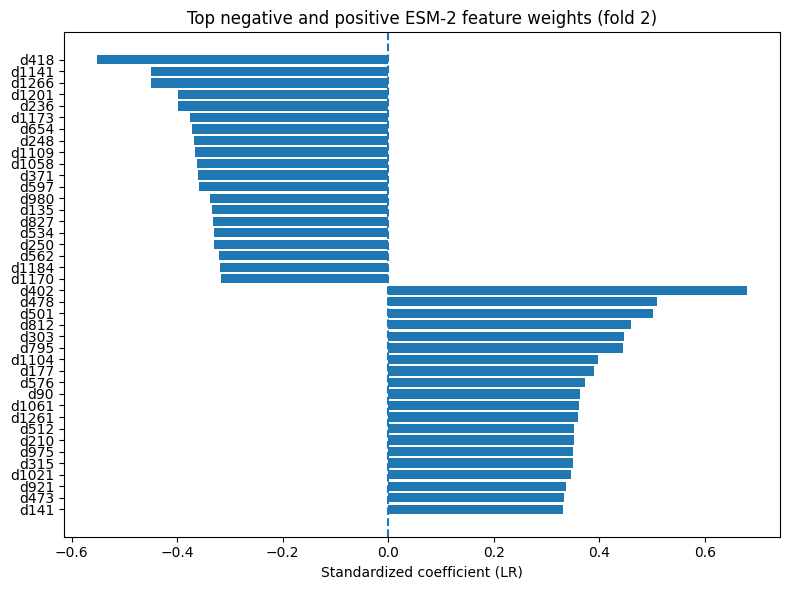

In [29]:
# ==== COEFFICIENT IMPORTANCE (LR) ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold, ids = D["X"], D["y"].astype(int), D["fold"].astype(int), D["ids"]

f = 2  # your reported fold
tr = fold != f; te = fold == f
Xtr, Xte, ytr, yte = X[tr], X[te], y[tr], y[te]

# sanity: standardization already done, but ensure zero-mean per train:
sc = StandardScaler(with_mean=False)  # avoid double-centering if already standardized
Xtr_s = sc.fit_transform(Xtr); Xte_s = sc.transform(Xte)

lr = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced", n_jobs=4)
lr.fit(Xtr_s, ytr)
coef = lr.coef_.ravel()  # shape (1280,)

# pick top-K pos/neg
K = 20
pos_idx = np.argsort(coef)[-K:][::-1]
neg_idx = np.argsort(coef)[:K]
top_idx = np.concatenate([neg_idx, pos_idx])
top_vals = coef[top_idx]
labels = [f"d{j}" for j in top_idx]  # "dimension j" labels

# plot
plt.figure(figsize=(8,6))
ypos = np.arange(len(top_idx))
plt.barh(ypos, top_vals)
plt.yticks(ypos, labels)
plt.axvline(0, linestyle="--")
plt.gca().invert_yaxis()
plt.xlabel("Standardized coefficient (LR)")
plt.title("Top negative and positive ESM-2 feature weights (fold 2)")
plt.tight_layout()
plt.savefig("/kaggle/working/lr_coeff_importance.pdf")
print("Saved: /kaggle/working/lr_coeff_importance.pdf")


In [30]:
# ==== DOMAIN ENRICHMENT (RRM/KH) IN TOP-K PREDICTIONS ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from math import log, sqrt, exp

# load same fold split and train LR (calibrated)
D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold, ids = D["X"], D["y"].astype(int), D["fold"].astype(int), D["ids"].astype(str)
f=2; tr = fold!=f; te = fold==f
Xtr, Xte, ytr, yte, ids_te = X[tr], X[te], y[tr], y[te], ids[te]

base = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced")
cal = CalibratedClassifierCV(base, cv=3, method="sigmoid")
cal.fit(Xtr, ytr)
p = cal.predict_proba(Xte)[:,1]

# top quantile threshold (top 10%)
q = 0.90
thr = np.quantile(p, q)
top_mask = p >= thr  # predicted-top set
print("Top set size:", top_mask.sum(), "of", len(p))

Top set size: 154 of 1537


Saved: /kaggle/working/confusion_matrix_fold2.pdf


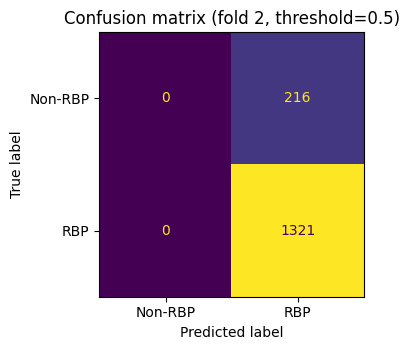

In [31]:
# ==== CONFUSION MATRIX (FOLD 2) ====
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold = D["X"], D["y"].astype(int), D["fold"].astype(int)
ids = D["ids"].astype(str)

f=2; tr=fold!=f; te=fold==f
Xtr,Xte,ytr,yte,ids_te = X[tr],X[te],y[tr],y[te],ids[te]

cal = CalibratedClassifierCV(LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced"),
                              cv=3, method="sigmoid")
cal.fit(Xtr,ytr)
p = cal.predict_proba(Xte)[:,1]

yhat = (p >= 0.5).astype(int)
cm = confusion_matrix(yte, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-RBP","RBP"])
fig, ax = plt.subplots(figsize=(4.2,3.6))
disp.plot(ax=ax, colorbar=False)
plt.title("Confusion matrix (fold 2, threshold=0.5)")
plt.tight_layout()
plt.savefig("/kaggle/working/confusion_matrix_fold2.pdf")
print("Saved: /kaggle/working/confusion_matrix_fold2.pdf")


Saved: /kaggle/working/case_studies_fold2.pdf


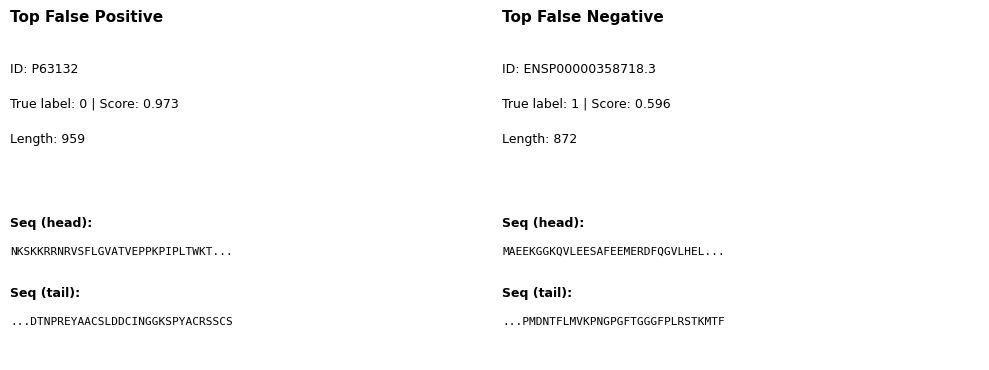

In [32]:
# ==== CASE STUDIES: TOP FP & FN (FOLD 2) ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from Bio import SeqIO

pos_fa = "/kaggle/working/rbp40_rep_seq.fasta"
neg_fa = "/kaggle/working/nonrbp40_rep_seq.fasta"

def canon_id(s):
    s = str(s).split()[0]
    if "|" in s:
        p = s.split("|")
        if len(p)>=2 and p[0] in {"sp","tr","UPI"}:
            return p[1]
    return s

# index sequences
seq_map = {}
for path in [pos_fa, neg_fa]:
    for r in SeqIO.parse(path, "fasta"):
        seq_map[canon_id(r.id)] = str(r.seq)

# load fold 2 preds
D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X, y, fold = D["X"], D["y"].astype(int), D["fold"].astype(int)
ids = D["ids"].astype(str)
f=2; tr=fold!=f; te=fold==f
Xtr,Xte,ytr,yte,ids_te = X[tr],X[te],y[tr],y[te],ids[te]

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
cal = CalibratedClassifierCV(LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced"),
                              cv=3, method="sigmoid")
cal.fit(Xtr,ytr)
p = cal.predict_proba(Xte)[:,1]

# pick cases
df = pd.DataFrame({"id":ids_te, "ytrue":yte, "p":p})
fp = df[df.ytrue==0].sort_values("p", ascending=False).head(1).iloc[0]
fn = df[df.ytrue==1].sort_values("p", ascending=True).head(1).iloc[0]

# optional domain map
try:
    dom = pd.read_csv("/kaggle/working/domain_map.csv")
    dom["id"] = dom["id"].astype(str)
    dom = dom.set_index("id")
except Exception:
    dom = None

def card(ax, row, title):
    pid = row["id"]
    seq = seq_map.get(pid, "")
    seq_len = len(seq)
    head = seq[:30] + ("..." if seq_len>60 else "")
    tail = ("..." if seq_len>60 else "") + seq[-30:] if seq_len>30 else ""
    ax.axis('off')
    ax.text(0.0, 1.0, f"{title}", fontsize=11, weight="bold", va="top")
    ax.text(0.0, 0.82, f"ID: {pid}", fontsize=9)
    ax.text(0.0, 0.72, f"True label: {int(row['ytrue'])} | Score: {row['p']:.3f}", fontsize=9)
    ax.text(0.0, 0.62, f"Length: {seq_len}", fontsize=9)
    if dom is not None and pid in dom.index:
        rr = dom.loc[pid]
        ax.text(0.0, 0.52, f"Domains: RRM={int(rr.get('has_RRM',0))}, KH={int(rr.get('has_KH',0))}", fontsize=9)
    ax.text(0.0, 0.38, "Seq (head):", fontsize=9, weight="bold")
    ax.text(0.0, 0.30, head, fontsize=8, family="monospace")
    ax.text(0.0, 0.18, "Seq (tail):", fontsize=9, weight="bold")
    ax.text(0.0, 0.10, tail, fontsize=8, family="monospace")

fig, axes = plt.subplots(1,2, figsize=(10,3.8))
card(axes[0], fp, "Top False Positive")
card(axes[1], fn, "Top False Negative")
plt.tight_layout()
plt.savefig("/kaggle/working/case_studies_fold2.pdf")
print("Saved: /kaggle/working/case_studies_fold2.pdf")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/figs/esm2_pooling_operator.pdf'

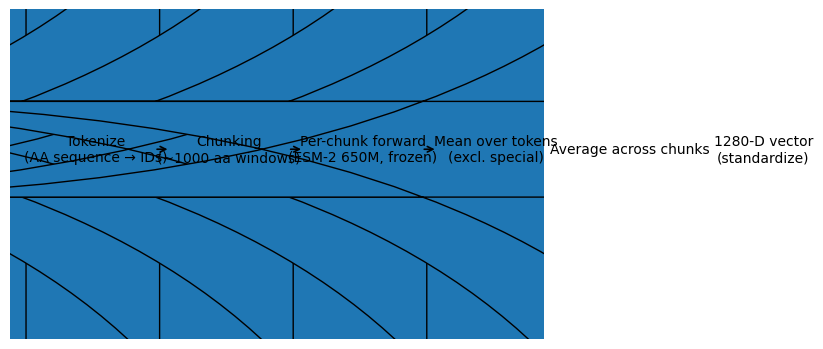

In [34]:
# ====== FIG 4: ESM-2 OPERATOR DIAGRAM ======
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(9, 3.6))
ax.axis('off')

def box(ax, xy, w, h, text):
    r = mpatches.FancyBboxPatch(xy, w, h, boxstyle="round,pad=0.02,rounding_size=2",
                                linewidth=1)
    ax.add_patch(r)
    ax.text(xy[0]+w/2, xy[1]+h/2, text, ha="center", va="center", fontsize=10)
    return r

def arrow(ax, p, q):
    ax.annotate("", xy=q, xytext=p, arrowprops=dict(arrowstyle="->", lw=1.2))

# Layout
x0, y0, w, h, dx = 0.05, 0.45, 0.22, 0.25, 0.03
b1 = box(ax, (x0, y0), w, h, "Tokenize\n(AA sequence → IDs)")
b2 = box(ax, (x0 + w + dx, y0), w, h, "Chunking\n(~1000 aa windows)")
b3 = box(ax, (x0 + 2*(w + dx), y0), w, h, "Per-chunk forward\n(ESM-2 650M, frozen)")
b4 = box(ax, (x0 + 3*(w + dx), y0), w, h, "Mean over tokens\n(excl. special)")
b5 = box(ax, (x0 + 4*(w + dx), y0), w, h, "Average across chunks")
b6 = box(ax, (x0 + 5*(w + dx), y0), w, h, "1280-D vector\n(standardize)")

# Arrows
arrow(ax, (x0+w, y0+h/2), (x0+w+dx, y0+h/2))
arrow(ax, (x0+2*w+dx, y0+h/2), (x0+2*w+2*dx, y0+h/2))
arrow(ax, (x0+3*w+2*dx, y0+h/2), (x0+3*w+3*dx, y0+h/2))
arrow(ax, (x0+4*w+3*dx, y0+h/2), (x0+4*w+4*dx, y0+h/2))
arrow(ax, (x0+5*w+4*dx, y0+h/2), (x0+5*w+5*dx, y0+h/2))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.savefig("/kaggle/working/figs/esm2_pooling_operator.pdf")
print("Saved: /kaggle/working/figs/esm2_pooling_operator.pdf")


In [36]:
# ====== COMMON SETUP ======
import time, os, math, gc
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (
    precision_recall_curve, roc_curve, average_precision_score,
    roc_auc_score, f1_score, confusion_matrix
)

# Load your prebuilt file
D = np.load("/kaggle/working/rbp_task3_ESM2.npz", allow_pickle=True)
X = D["X"].astype(np.float32)          # (N, 1280)
y = D["y"].astype(int)
fold = D["fold"].astype(int)
ids = D["ids"].astype(str)

os.makedirs("/kaggle/working/figs", exist_ok=True)

def train_lr_and_svm(Xtr, ytr):
    """Return (LR_prob_model, SVM_prob_model) both with .predict_proba."""
    lr = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced", n_jobs=4)
    lr.fit(Xtr, ytr)

    base_svm = LinearSVC(C=1.0, class_weight="balanced")
    svm = CalibratedClassifierCV(base_svm, cv=3, method="sigmoid")
    svm.fit(Xtr, ytr)
    return lr, svm

def bootstrap_ci(y_true, y_score, n=1000, seed=0):
    """Return 95% CI dict for AP, ROC-AUC, F1@0.5 using nonparametric bootstrap."""
    rng = np.random.default_rng(seed)
    N = len(y_true)
    ap, auroc, f1s = [], [], []
    thr = 0.5
    for _ in range(n):
        idx = rng.integers(0, N, size=N)
        yt = y_true[idx]; ps = y_score[idx]
        ap.append(average_precision_score(yt, ps))
        # roc_auc needs both classes present; guard:
        if yt.min() != yt.max():
            auroc.append(roc_auc_score(yt, ps))
        else:
            auroc.append(np.nan)
        f1s.append(f1_score(yt, (ps >= thr).astype(int)))
    def ci(a):
        a = np.array(a, dtype=float)
        a = a[~np.isnan(a)]
        lo, hi = np.percentile(a, [2.5, 97.5])
        return float(lo), float(hi)
    return {"AP": ci(ap), "ROC-AUC": ci(auroc), "F1@0.5": ci(f1s)}


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Saved PR/ROC PDFs for fold 2
                 Model        AP   ROC-AUC    F1@0.5  \
0  Logistic Regression  0.890718  0.562633  0.232404   
1    Linear SVM (cal.)  0.870925  0.530429  0.924423   

                                  AP 95% CI  \
0  (0.8697980527092448, 0.9107649489327362)   
1  (0.8484651079223955, 0.8959468884544565)   

                             ROC-AUC 95% CI  \
0  (0.5243785629553502, 0.6025041916393631)   
1  (0.4895650063128103, 0.5708367332447896)   

                                   F1 95% CI  
0  (0.20281773546548562, 0.2596734063131504)  
1   (0.9137809187279152, 0.9348579348579349)  
Saved: /kaggle/working/figs/results_fold2_with_ci.csv


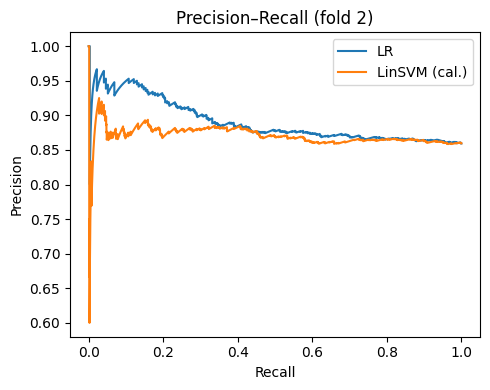

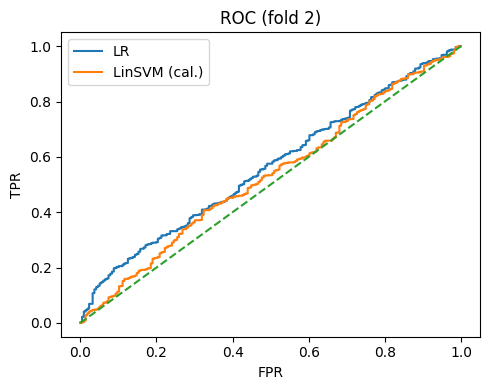

In [37]:
# ====== FIG 5: PR/ROC CURVES + RESULTS TABLE (FOLD 2 AS EXAMPLE) ======
f = 2
tr, te = (fold != f), (fold == f)
Xtr, Xte, ytr, yte = X[tr], X[te], y[tr], y[te]

lr, svm = train_lr_and_svm(Xtr, ytr)
p_lr  = lr.predict_proba(Xte)[:, 1]
p_svm = svm.predict_proba(Xte)[:, 1]

# Curves
prec_lr, rec_lr, _ = precision_recall_curve(yte, p_lr)
fpr_lr,  tpr_lr,  _ = roc_curve(yte, p_lr)
prec_sv, rec_sv, _ = precision_recall_curve(yte, p_svm)
fpr_sv,  tpr_sv,  _ = roc_curve(yte, p_svm)

# PR plot
plt.figure(figsize=(5.0,4.0))
plt.plot(rec_lr, prec_lr, label="LR")
plt.plot(rec_sv, prec_sv, label="LinSVM (cal.)")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall (fold 2)")
plt.legend(); plt.tight_layout()
plt.savefig("/kaggle/working/figs/pr_curves_fold2.pdf")

# ROC plot
plt.figure(figsize=(5.0,4.0))
plt.plot(fpr_lr, tpr_lr, label="LR")
plt.plot(fpr_sv, tpr_sv, label="LinSVM (cal.)")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (fold 2)")
plt.legend(); plt.tight_layout()
plt.savefig("/kaggle/working/figs/roc_curves_fold2.pdf")
print("Saved PR/ROC PDFs for fold 2")

# Metrics + bootstrap CIs
def metrics_with_ci(y_true, p):
    ap  = average_precision_score(y_true, p)
    roc = roc_auc_score(y_true, p)
    f1  = f1_score(y_true, (p>=0.5).astype(int))
    ci  = bootstrap_ci(y_true, p, n=1000, seed=42)
    return ap, roc, f1, ci

ap_lr, roc_lr, f1_lr, ci_lr   = metrics_with_ci(yte, p_lr)
ap_sv, roc_sv, f1_sv, ci_sv   = metrics_with_ci(yte, p_svm)

res = pd.DataFrame([
    ["Logistic Regression", ap_lr, roc_lr, f1_lr, ci_lr["AP"], ci_lr["ROC-AUC"], ci_lr["F1@0.5"]],
    ["Linear SVM (cal.)",   ap_sv, roc_sv, f1_sv, ci_sv["AP"], ci_sv["ROC-AUC"], ci_sv["F1@0.5"]],
], columns=["Model","AP","ROC-AUC","F1@0.5","AP 95% CI","ROC-AUC 95% CI","F1 95% CI"])
print(res)
res.to_csv("/kaggle/working/figs/results_fold2_with_ci.csv", index=False)
print("Saved: /kaggle/working/figs/results_fold2_with_ci.csv")


Saved threshold-analysis PDFs
Saved: /kaggle/working/figs/reliability_lr_fold2.pdf


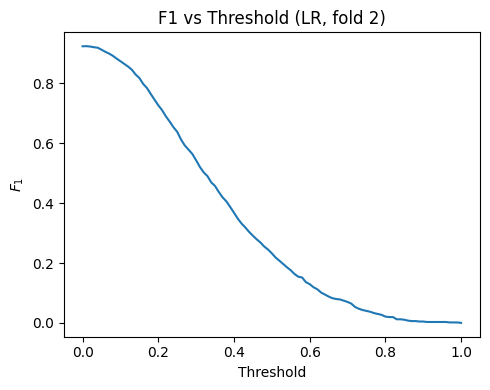

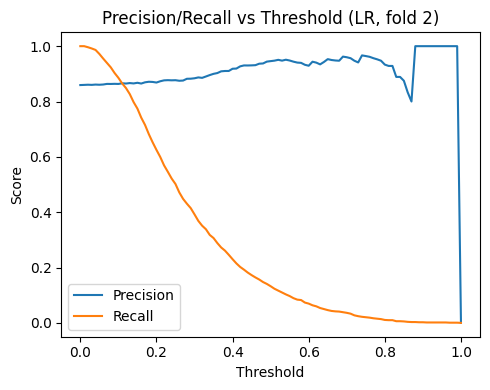

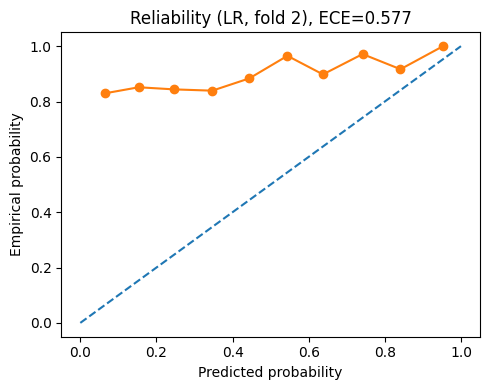

In [39]:
# ====== FIG 6a: F1 vs THRESHOLD + PREC/RECALL ======
thr = np.linspace(0.0, 1.0, 101)
f1s, precs, recs = [], [], []
for t in thr:
    yhat = (p_lr >= t).astype(int)
    # precision/recall via confusion matrix (avoid importing extra funcs)
    tp = np.sum((yte==1)&(yhat==1))
    fp = np.sum((yte==0)&(yhat==1))
    fn = np.sum((yte==1)&(yhat==0))
    prec = tp / (tp+fp) if (tp+fp)>0 else 0.0
    rec  = tp / (tp+fn) if (tp+fn)>0 else 0.0
    precs.append(prec); recs.append(rec)
    f1s.append( (2*prec*rec)/(prec+rec) if (prec+rec)>0 else 0.0 )

plt.figure(figsize=(5.0,4.0))
plt.plot(thr, f1s)
plt.xlabel("Threshold"); plt.ylabel("$F_1$")
plt.title("F1 vs Threshold (LR, fold 2)")
plt.tight_layout()
plt.savefig("/kaggle/working/figs/threshold_f1_fold2.pdf")

plt.figure(figsize=(5.0,4.0))
plt.plot(thr, precs, label="Precision")
plt.plot(thr, recs, label="Recall")
plt.xlabel("Threshold"); plt.ylabel("Score")
plt.title("Precision/Recall vs Threshold (LR, fold 2)")
plt.legend(); plt.tight_layout()
plt.savefig("/kaggle/working/figs/threshold_pr_fold2.pdf")
print("Saved threshold-analysis PDFs")

# ====== FIG 6b: RELIABILITY DIAGRAM + ECE ======
prob_true, prob_pred = calibration_curve(yte, p_lr, n_bins=10, strategy="uniform")
# expected calibration error
bin_edges = np.linspace(0,1,11)
ece = 0.0
for i in range(10):
    mask = (p_lr >= bin_edges[i]) & (p_lr < bin_edges[i+1])
    if mask.sum() == 0: 
        continue
    gap = abs(prob_true[i] - prob_pred[i])
    ece += (mask.sum()/len(p_lr)) * gap

plt.figure(figsize=(5.0,4.0))
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(prob_pred, prob_true, marker="o")
plt.xlabel("Predicted probability"); plt.ylabel("Empirical probability")
plt.title(f"Reliability (LR, fold 2), ECE={ece:.3f}")
plt.tight_layout()
plt.savefig("/kaggle/working/figs/reliability_lr_fold2.pdf")
print("Saved: /kaggle/working/figs/reliability_lr_fold2.pdf")


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


      Model  Train time (s)  Infer time (s)  Model size (MB)        AP
0        LR       57.789743        0.004037         0.010457  0.890718
1    LinSVM      173.050399      327.968525         0.010346  0.887913
2  Tiny MLP       30.665395        0.018480         9.016814  0.895947
Saved efficiency plots and CSV


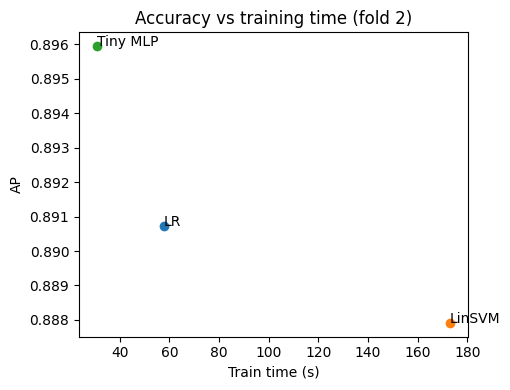

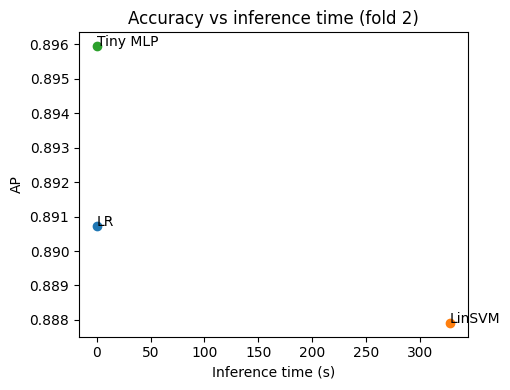

In [40]:
# ====== FIG 7: RUNTIME/FOOTPRINT VS ACCURACY ======
import psutil, sys, pickle

def time_model(clf, Xtr, ytr, Xte, yte):
    t0 = time.time()
    clf.fit(Xtr, ytr)
    t1 = time.time()
    if hasattr(clf, "predict_proba"):
        p = clf.predict_proba(Xte)[:,1]
    else:
        # calibrate to get probabilities
        cal = CalibratedClassifierCV(clf, cv=3, method="sigmoid")
        cal.fit(Xtr, ytr)
        p = cal.predict_proba(Xte)[:,1]
    t2 = time.time()
    ap = average_precision_score(yte, p)
    # naive "model size": serialize
    by = pickle.dumps(clf)
    size_mb = len(by)/(1024*1024)
    return (t1-t0), (t2-t1), size_mb, ap

# Tiny MLP baseline (scikit MLPClassifier for CPU fairness)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(512,256), activation="relu",
                    alpha=1e-4, max_iter=50, early_stopping=True)

lr_base  = LogisticRegression(max_iter=2000, C=1.0, class_weight="balanced", n_jobs=4)
svm_base = LinearSVC(C=1.0, class_weight="balanced")

models = [("LR", lr_base), ("LinSVM", svm_base), ("Tiny MLP", mlp)]
rows = []
for name, clf in models:
    gc.collect()
    tr_time, inf_time, size_mb, ap = time_model(clf, Xtr, ytr, Xte, yte)
    rows.append((name, tr_time, inf_time, size_mb, ap))
df = pd.DataFrame(rows, columns=["Model","Train time (s)","Infer time (s)","Model size (MB)","AP"])
print(df)
df.to_csv("/kaggle/working/figs/efficiency_fold2.csv", index=False)

# scatter: AP vs time
plt.figure(figsize=(5.2,4.0))
for _, r in df.iterrows():
    plt.scatter(r["Train time (s)"], r["AP"])
    plt.text(r["Train time (s)"], r["AP"], r["Model"])
plt.xlabel("Train time (s)"); plt.ylabel("AP"); plt.title("Accuracy vs training time (fold 2)")
plt.tight_layout()
plt.savefig("/kaggle/working/figs/efficiency_tradeoff_train.pdf")

plt.figure(figsize=(5.2,4.0))
for _, r in df.iterrows():
    plt.scatter(r["Infer time (s)"], r["AP"])
    plt.text(r["Infer time (s)"], r["AP"], r["Model"])
plt.xlabel("Inference time (s)"); plt.ylabel("AP"); plt.title("Accuracy vs inference time (fold 2)")
plt.tight_layout()
plt.savefig("/kaggle/working/figs/efficiency_tradeoff_infer.pdf")
print("Saved efficiency plots and CSV")


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: /kaggle/working/figs/umap_embeddings.pdf


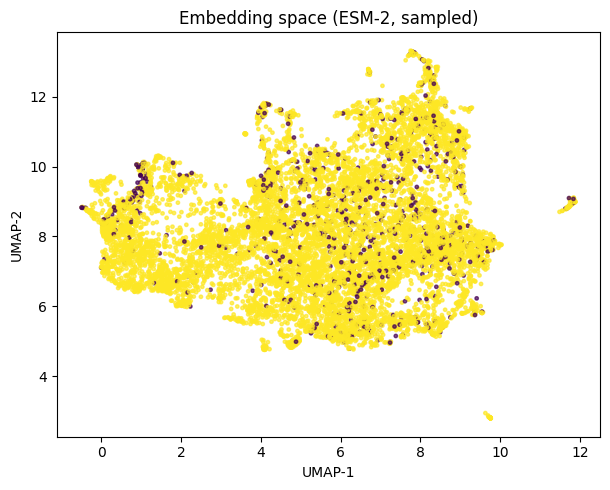

In [41]:
# ====== FIG 8: UMAP (FALLBACK TO PCA IF NEEDED) ======
# Optional domain shapes: provide /kaggle/working/domain_map.csv with columns: id,has_RRM,has_KH
try:
    dom = pd.read_csv("/kaggle/working/domain_map.csv")
    dom["id"] = dom["id"].astype(str)
    dom = dom.set_index("id")
except Exception:
    dom = None

# sample for speed/clarity
rng = np.random.default_rng(0)
N = X.shape[0]
keep = min(10000, N)
idx = rng.choice(N, size=keep, replace=False)
Xs = X[idx]; ys = y[idx]; ids_s = ids[idx]

marker = None
if dom is not None:
    mk = []
    for i in ids_s:
        has = False
        if i in dom.index:
            rr = int(dom.loc[i].get("has_RRM",0))
            kh = int(dom.loc[i].get("has_KH",0))
            has = (rr==1 or kh==1)
        mk.append(has)
    marker = np.array(mk)

# Try UMAP
try:
    import umap
    reducer = umap.UMAP(random_state=0)
    emb2 = reducer.fit_transform(Xs)
except Exception:
    # fallback: PCA
    from sklearn.decomposition import PCA
    emb2 = PCA(n_components=2, random_state=0).fit_transform(Xs)

plt.figure(figsize=(6.2,5.0))
if marker is None:
    plt.scatter(emb2[:,0], emb2[:,1], s=6, alpha=0.7, c=ys)
else:
    # two scatters by domain presence shape (circles vs triangles)
    mask_dom = marker
    plt.scatter(emb2[~mask_dom,0], emb2[~mask_dom,1], s=6, alpha=0.7, c=ys[~mask_dom], marker='o')
    plt.scatter(emb2[mask_dom,0], emb2[mask_dom,1], s=12, alpha=0.8, c=ys[mask_dom], marker='^')
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.title("Embedding space (ESM-2, sampled)")
plt.tight_layout()
plt.savefig("/kaggle/working/figs/umap_embeddings.pdf")
print("Saved: /kaggle/working/figs/umap_embeddings.pdf")
